In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, inspect, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import epri_mc_lib_3 as mc
from importlib import reload
reload(mc)


<module 'epri_mc_lib_3' from '/home/nick/Bureau/Programming/S2DS/Oct20_EPRI/Task3/NB/epri_mc_lib_3.py'>

In [2]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/CopulaGAN_simulated_data_survival.csv'),
                  index_col=0)
data

,F_Time,NDE_cycle,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio,NLE_ratio_51_17,NLE_ratio_85_17,NLE_ratio_119_17,NLO_avg,Avg_RP,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
Observed,,,,,,,,,,,,,,
True,4.696176e+05,600000,0.652425,1.246098,0.997119,0.904570,0.920096,1.088206,0.467396,5.735330,175.609656,-0.770646,-1.285146,3.326268
True,3.258237e+05,450000,0.720146,1.262309,0.993423,0.980101,0.857370,1.101848,0.467855,3.645883,169.717689,-0.581949,-1.358144,2.985542
False,1.163226e+06,750000,0.563658,1.160935,0.996580,0.750480,0.884058,1.077712,0.470394,7.851831,170.982320,-0.769570,-1.502093,3.510375
True,1.845031e+06,900000,0.514807,1.037140,1.000231,0.737361,0.907228,1.150152,0.488943,5.009504,171.280515,-1.024741,-1.227602,2.845183
True,1.453082e+06,900000,0.379343,1.170794,0.998513,0.826376,0.896547,1.162720,0.488752,5.828494,170.252894,-0.828375,-1.248879,3.067759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
False,2.825437e+06,900000,0.552311,1.175387,0.997886,0.907612,0.882277,1.120056,0.485095,7.860860,170.004194,-0.771458,-0.896907,4.420880
False,2.665376e+06,0,1.976501,1.194383,0.993424,1.446834,0.895328,1.135725,0.482671,3.692038,186.416143,-0.131110,-3.008475,4.146605
True,5.166930e+05,750000,0.306940,1.017359,1.002774,0.624054,0.916610,1.100316,0.483606,6.820040,174.078034,-0.866947,-1.642809,3.278346


In [3]:
data_x = data.iloc[:, 1:]


In [4]:
scaled_df = mc.scale_general(data_x, MinMaxScaler())[0]
scaled_df

,NDE_cycle,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio,NLE_ratio_51_17,NLE_ratio_85_17,NLE_ratio_119_17,NLO_avg,Avg_RP,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
Observed,,,,,,,,,,,,,
True,0.666667,0.252297,0.699921,0.440154,0.377105,0.541095,0.276943,0.391174,0.556950,1.475230e-01,0.366579,0.788019,0.379462
True,0.500000,0.281793,0.718712,0.361779,0.434986,0.225277,0.330454,0.394571,0.121693,1.941558e-12,0.498161,0.764449,0.263169
False,0.833333,0.213635,0.601206,0.428722,0.259023,0.359649,0.235778,0.413353,0.997842,3.166380e-02,0.367330,0.717971,0.442299
True,1.000000,0.192358,0.457712,0.506130,0.248970,0.476309,0.519926,0.550553,0.405752,3.913002e-02,0.189393,0.806598,0.215263
True,1.000000,0.133357,0.612634,0.469701,0.317184,0.422531,0.569222,0.549143,0.576357,1.340045e-02,0.326323,0.799728,0.291230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
False,1.000000,0.208693,0.617959,0.456415,0.379436,0.350681,0.401873,0.522094,0.999723,7.173492e-03,0.366013,0.913373,0.753062
False,0.000000,0.828996,0.639977,0.361806,0.792652,0.416391,0.463336,0.504163,0.131308,4.180956e-01,0.812540,0.231594,0.659449
True,0.833333,0.101822,0.434784,0.560050,0.162141,0.523543,0.324444,0.511079,0.782908,1.091742e-01,0.299427,0.672537,0.363105


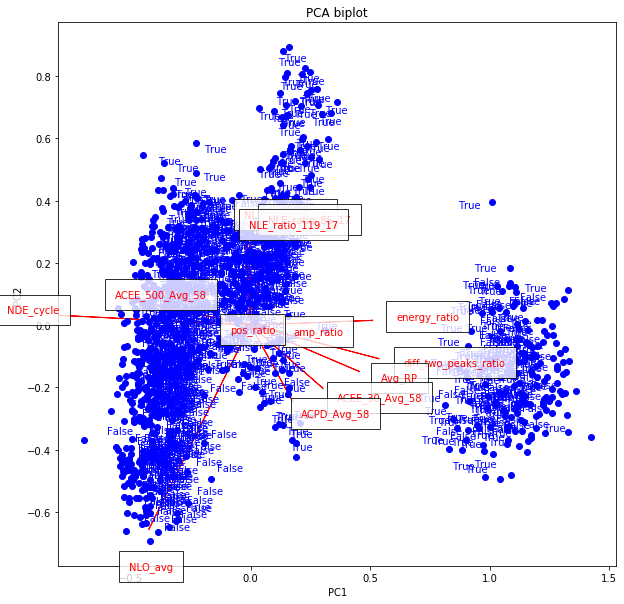

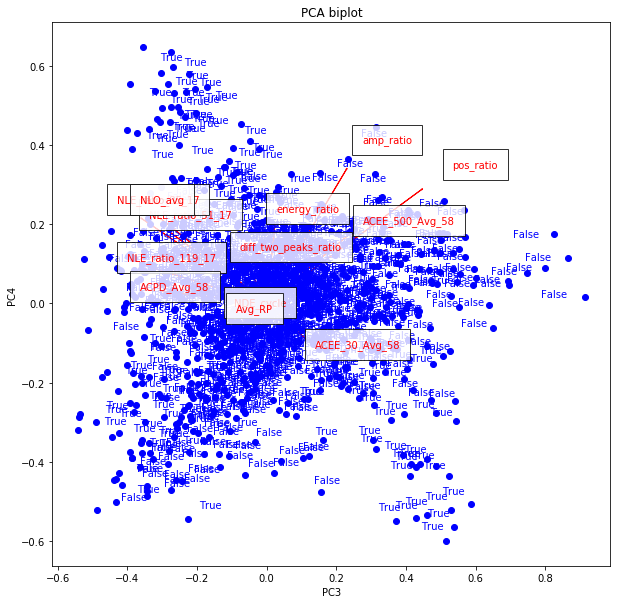

In [5]:
pca = PCA(n_components=4, svd_solver='full')
pca.fit(scaled_df)
mc.biplot(pca, scaled_df, 0, 1, "PCA biplot")    
mc.biplot(pca, scaled_df, 2, 3, "PCA biplot")    

Text(0, 0.5, 'Explained variance')

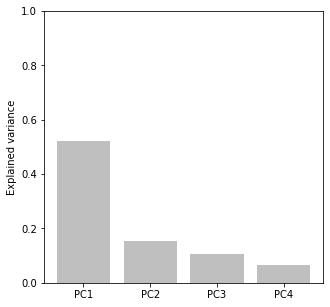

In [6]:
plt.figure(figsize=(5, 5))
plt.bar(["PC1","PC2","PC3","PC4"],pca.explained_variance_ratio_, align='center', alpha=0.5, color="gray")
plt.ylim(0,1)
plt.ylabel("Explained variance")

Text(0, 0.5, 'Explained variance')

<Figure size 432x432 with 0 Axes>

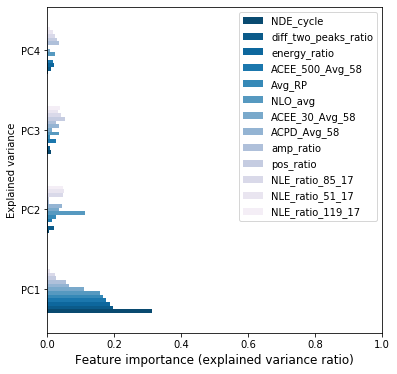

In [7]:
plt.figure(figsize=(6, 6))
feature_importance = pd.DataFrame([x*abs(y) for x,y in zip(pca.explained_variance_ratio_, pca.components_)],columns=scaled_df.columns, index=["PC1","PC2","PC3","PC4"] )
plot_feat_imp = feature_importance.transpose().sort_values('PC1', ascending=False).transpose()
plot_feat_imp.plot(kind='barh', color=sns.color_palette('PuBu_r', 13, desat=0.9), width=0.6, figsize=(6,6))
plt.xlabel('Feature importance (explained variance ratio)', fontsize = 12)
plt.xlim(0,1)
plt.ylabel("Explained variance")